# Importação de Bibliotecas

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Importando os Dados

In [14]:
trilhaDadosJR = pd.read_csv('/content/TrilhaDadosJR.csv', sep = ',', encoding='latin1')
trilhaDadosJR.head()

,ID,Nome do Curso,Quantidade de Vendas,Preço Unitário,Data
0,1,Introdução à Programação em Python,50,39.9,2023-01-01
1,2,Desenvolvimento Web com HTML e CSS,30,59.9,2023-01-02
2,3,JavaScript Avançado: Frameworks e Bibliotecas,20,79.9,2023-01-03
3,4,Introdução ao Machine Learning,15,99.9,2023-01-04
4,5,Desenvolvimento Mobile com React Native,25,69.9,2023-01-05


# Analisando o DataSet trilhaDadosJR

In [15]:
trilhaDadosJR.describe()

,ID,Quantidade de Vendas,Preço Unitário
count,25.000000,25.000000,25.000000
mean,13.000000,17.960000,83.900000
std,7.359801,10.921996,21.984843
min,1.000000,5.000000,39.900000
25%,7.000000,10.000000,69.900000
50%,13.000000,15.000000,79.900000
75%,19.000000,20.000000,99.900000
max,25.000000,50.000000,119.900000


In [16]:
print(f'Linhas do dataset: {trilhaDadosJR.shape[0]}')
print(f'Colunas do dataset: {trilhaDadosJR.shape[1]}')
print(f'{trilhaDadosJR.keys()}')

Linhas do dataset: 25
Colunas do dataset: 5
Index(['ID', 'Nome do Curso', 'Quantidade de Vendas', 'Preço Unitário',
       'Data'],
      dtype='object')


In [17]:
trilhaDadosJR.isna().sum()

ID                      0
Nome do Curso           0
Quantidade de Vendas    0
Preço Unitário          0
Data                    0
dtype: int64

# Visualização dos Dados

## Criando Mapa de Calor

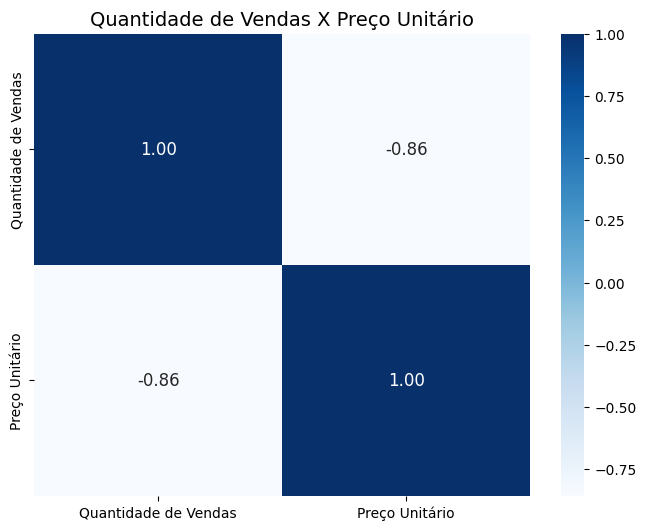

In [18]:
# Calculando a matriz de correlação
correlation_matrix = trilhaDadosJR[['Quantidade de Vendas', 'Preço Unitário']].corr()

# Plotando o mapa de calor
plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', annot_kws={'size': 12})
plt.title('Quantidade de Vendas X Preço Unitário', fontsize=14, loc='center')
plt.show()

## Criando Gráficos


### Calculando Receita total gerada pela venda dos cursos

In [23]:
# Calculando a receita total
trilhaDadosJR['Receita'] = trilhaDadosJR['Quantidade de Vendas'] * trilhaDadosJR['Preço Unitário']
receita_total = trilhaDadosJR['Receita'].sum()

print(f"A receita total gerada pela venda dos cursos é: R${receita_total:.2f}")

A receita total gerada pela venda dos cursos é: R$32735.10


### Curso com maior número de vendas

In [24]:
curso_mais_vendas = trilhaDadosJR.loc[trilhaDadosJR['Quantidade de Vendas'].idxmax()]

print(f"Curso com o maior número de vendas:\n{curso_mais_vendas}")

Curso com o maior número de vendas:
ID                                                       1
Nome do Curso           Introdução à Programação em Python
Quantidade de Vendas                                    50
Preço Unitário                                        39.9
Data                                            2023-01-01
Receita                                             1995.0
Name: 0, dtype: object


### Distribuição das vendas ao longo do tempo

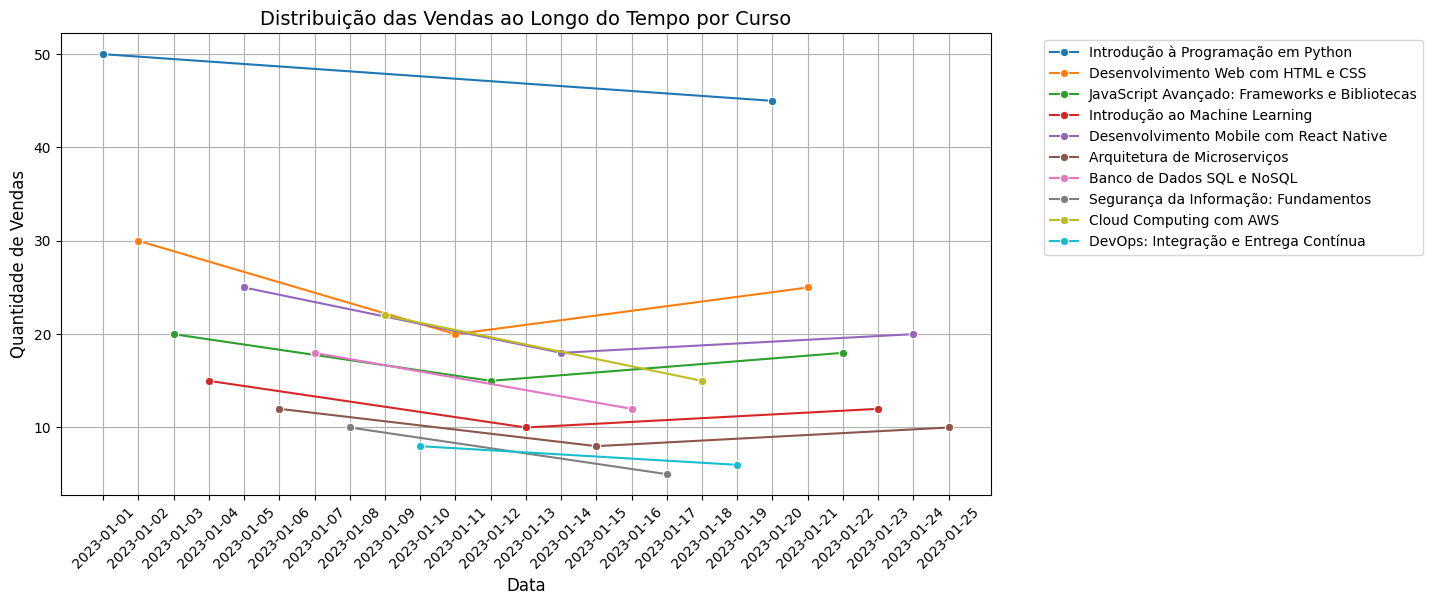

In [21]:
plt.figure(figsize=(12, 6))
sb.lineplot(data=trilhaDadosJR, x='Data', y='Quantidade de Vendas', hue='Nome do Curso', marker='o')
plt.title('Distribuição das Vendas ao Longo do Tempo por Curso', fontsize=14, loc='center')
plt.xlabel('Data', fontsize=12)
plt.ylabel('Quantidade de Vendas', fontsize=12)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### Distribuição das Vendas ao longo do tempo

<ipython-input-22-a7e6f3e9d34f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(trilhaDadosJR['Quantidade de Vendas'].dropna())
<ipython-input-22-a7e6f3e9d34f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(trilhaDadosJR['Quantidade de Vendas'].dropna())
<ipython-input-22-a7e6f3e9d34f>:2: UserW

Text(0.5, 1.0, 'Distribuição das Vendas ao Longo do Tempo')

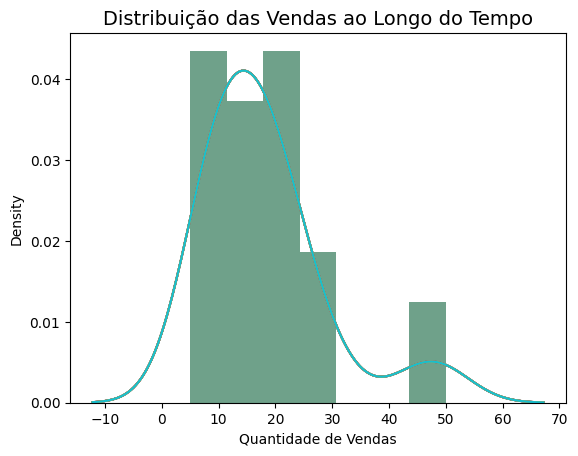

In [22]:
for curso in trilhaDadosJR['Nome do Curso'].unique():
  sb.distplot(trilhaDadosJR['Quantidade de Vendas'].dropna())

plt.title('Distribuição das Vendas ao Longo do Tempo', fontsize=14, loc='center')